In [2]:
!pip install pandas


  Using cached pandas-2.3.1-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.1-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached numpy-2.3.1-cp313-cp313-win_amd64.whl (12.7 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [p

In [6]:
import pandas as pd
df = pd.read_csv(r'C:\Users\avnis\OneDrive\Documents\ELEVATE JOBS\Retail-Analysis-Project\data\online_retail_II.csv',
                 encoding='ISO-8859-1')

df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
#Standardize column names
df = df.rename(columns={
    'Invoice': 'InvoiceNo',
    'Price': 'UnitPrice',
    'Customer ID': 'CustomerID'  
})


In [ ]:
#Basic shape and null overview
print("Rows × Cols :", df.shape)
display(df.head())

df.info()          
df.describe()      


Rows × Cols : (1067371, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   InvoiceNo    1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   UnitPrice    1067371 non-null  float64
 6   CustomerID   824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


,Quantity,UnitPrice,CustomerID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [ ]:
#Keep only positive‑sale rows (no returns)
mask = (~df['InvoiceNo'].astype(str).str.startswith('C')) & (df['Quantity'] > 0)
df_clean = df[mask].copy()

print("After removing cancelled/return rows :", df_clean.shape)


After removing cancelled/return rows : (1044420, 8)


In [ ]:
#Drop rows missing CustomerID or Description
df_clean = df_clean.dropna(subset=['CustomerID', 'Description'])

#Add TotalPrice column
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

df_clean.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [ ]:
import os

os.makedirs('output', exist_ok=True)   
df_clean.to_csv('output/online_retail_clean.csv', index=False)
print("✅ Cleaned CSV saved to output/online_retail_clean.csv")


✅ Cleaned CSV saved to output/online_retail_clean.csv


In [12]:
df_clean.to_csv('output/online_retail_clean.csv', index=False)
print("✅ Cleaned CSV saved to output/online_retail_clean.csv")



✅ Cleaned CSV saved to output/online_retail_clean.csv


In [ ]:
#Group by Product Description and sum up Quantity and TotalPrice
product_profit = df_clean.groupby('Description').agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).sort_values('TotalPrice', ascending=False).reset_index()


product_profit.head(10)


,Description,Quantity,TotalPrice
0,REGENCY CAKESTAND 3 TIER,24914,286486.30
1,WHITE HANGING HEART T-LIGHT HOLDER,93640,252072.46
2,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
3,Manual,9810,152340.57
4,JUMBO BAG RED RETROSPOT,75759,136980.08
5,ASSORTED COLOUR BIRD ORNAMENT,79913,127074.17
6,POSTAGE,5333,126563.04
7,PARTY BUNTING,23611,103880.23
8,MEDIUM CERAMIC TOP STORAGE JAR,77916,81416.73
9,PAPER CHAIN KIT 50'S CHRISTMAS,29477,79594.33


In [14]:
product_profit.tail(10)


,Description,Quantity,TotalPrice
5273,WHITE SCANDINAVIAN HEART CHRISTMAS,1,1.250
5274,HOLLYHOCK SQUARE HANDY TIN,1,1.250
5275,SET 36 COLOURING PENCILS DOILEY,1,1.250
5276,CAT WITH SUNGLASSES BLANK CARD,5,0.950
5277,OWLS CHARLOTTE BAG,1,0.850
5278,CAT W SUNGLASSES BLANK CARD,4,0.760
5279,SET 12 COLOURING PENCILS DOILEY,1,0.650
5280,HAPPY BIRTHDAY GINGER CAT CARD,2,0.380
5281,PINK HEART CHRISTMAS DECORATION,1,0.380
5282,PADS TO MATCH ALL CUSHIONS,18,0.017


In [25]:
!pip install seaborn matplotlib


  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------------------------- ------- 1.8/2.2 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 7.7 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl (7.0 MB)
Using cached pyparsing-3.2.3-py3-none-an

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\avnis\AppData\Local\Temp\ipykernel_31248\612461743.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_profit.head(10), x='TotalPrice', y='Description', palette='Greens_r')


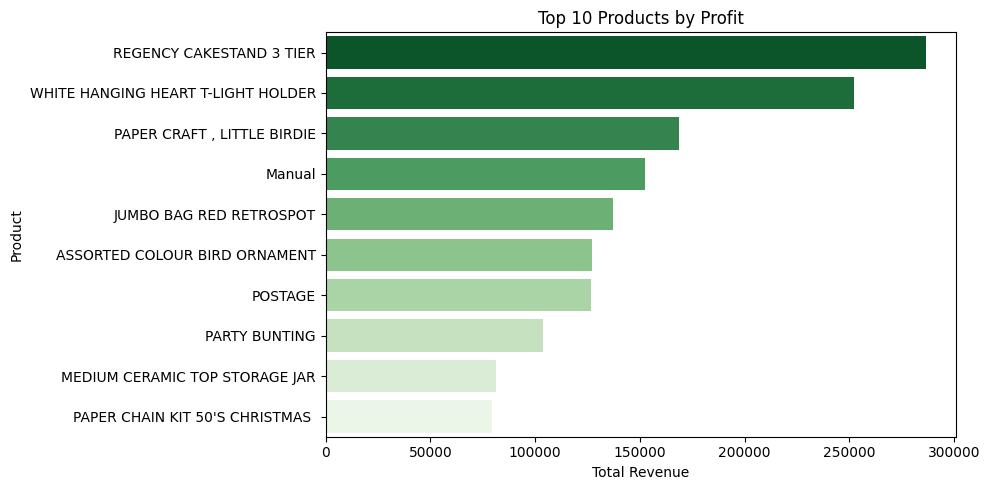

C:\Users\avnis\AppData\Local\Temp\ipykernel_31248\612461743.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_profit.tail(10), x='TotalPrice', y='Description', palette='Reds')


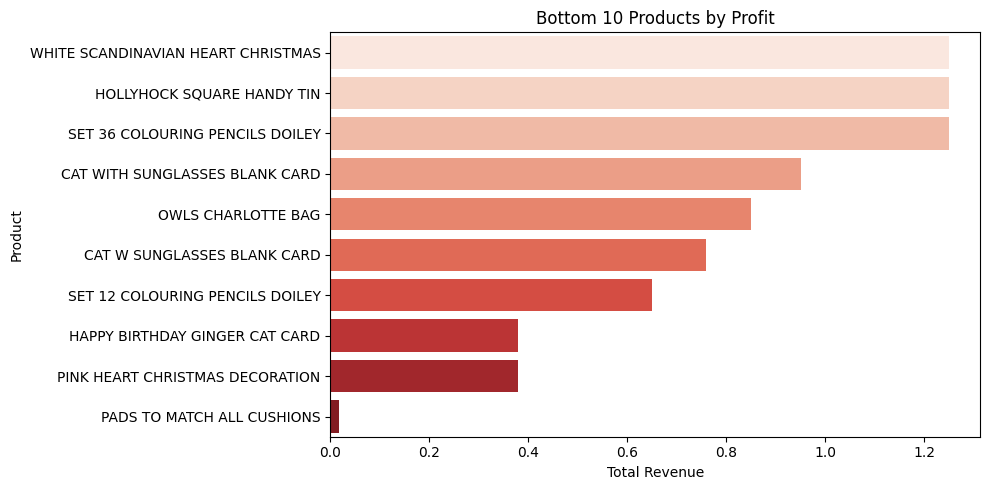

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Top 10 profitable
plt.figure(figsize=(10, 5))
sns.barplot(data=product_profit.head(10), x='TotalPrice', y='Description', palette='Greens_r')
plt.title('Top 10 Products by Profit')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

#Bottom 10
plt.figure(figsize=(10, 5))
sns.barplot(data=product_profit.tail(10), x='TotalPrice', y='Description', palette='Reds')
plt.title('Bottom 10 Products by Profit')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


In [ ]:
#Ensure InvoiceDate is datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

#Add a 'Date' column without time for easier grouping
df_clean['Date'] = df_clean['InvoiceDate'].dt.date

#Total days each product was sold
product_days = df_clean.groupby('Description')['Date'].nunique().reset_index()
product_days.columns = ['Description', 'DaysSold']
product_days.head()


,Description,DaysSold
0,DOORMAT UNION JACK GUNS AND ROSES,24
1,3 STRIPEY MICE FELTCRAFT,59
2,4 PURPLE FLOCK DINNER CANDLES,44
3,50'S CHRISTMAS GIFT BAG LARGE,60
4,ANIMAL STICKERS,12


In [ ]:
#Total sales + quantity per product
product_sales = df_clean.groupby('Description').agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).reset_index()

#Merge days sold
product_sales = pd.merge(product_sales, product_days, on='Description')

#Calculate avg daily sales
product_sales['AvgDailyQty'] = product_sales['Quantity'] / product_sales['DaysSold']
product_sales.head()


,Description,Quantity,TotalPrice,DaysSold,AvgDailyQty
0,DOORMAT UNION JACK GUNS AND ROSES,169,1084.75,24,7.041667
1,3 STRIPEY MICE FELTCRAFT,663,1243.05,59,11.237288
2,4 PURPLE FLOCK DINNER CANDLES,340,535.96,44,7.727273
3,50'S CHRISTMAS GIFT BAG LARGE,1885,2272.25,60,31.416667
4,ANIMAL STICKERS,385,80.85,12,32.083333


             AvgDailyQty  TotalPrice
AvgDailyQty     1.000000    0.244607
TotalPrice      0.244607    1.000000


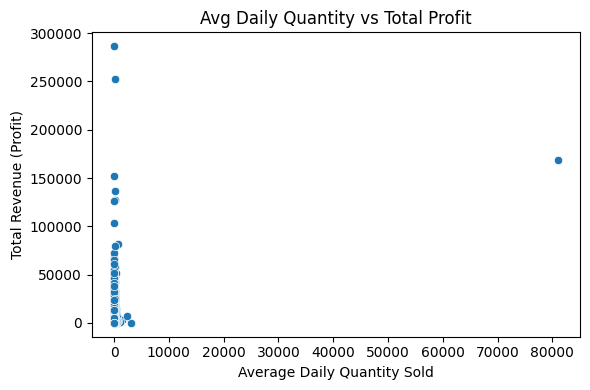

In [ ]:
corr = product_sales[['AvgDailyQty', 'TotalPrice']].corr()
print(corr)

plt.figure(figsize=(6, 4))
sns.scatterplot(data=product_sales, x='AvgDailyQty', y='TotalPrice')
plt.title('Avg Daily Quantity vs Total Profit')
plt.xlabel('Average Daily Quantity Sold')
plt.ylabel('Total Revenue (Profit)')
plt.tight_layout()
plt.show()


C:\Users\avnis\AppData\Local\Temp\ipykernel_31248\1188912954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_sales.head(10), x='TotalPrice', y='Country', palette='coolwarm')


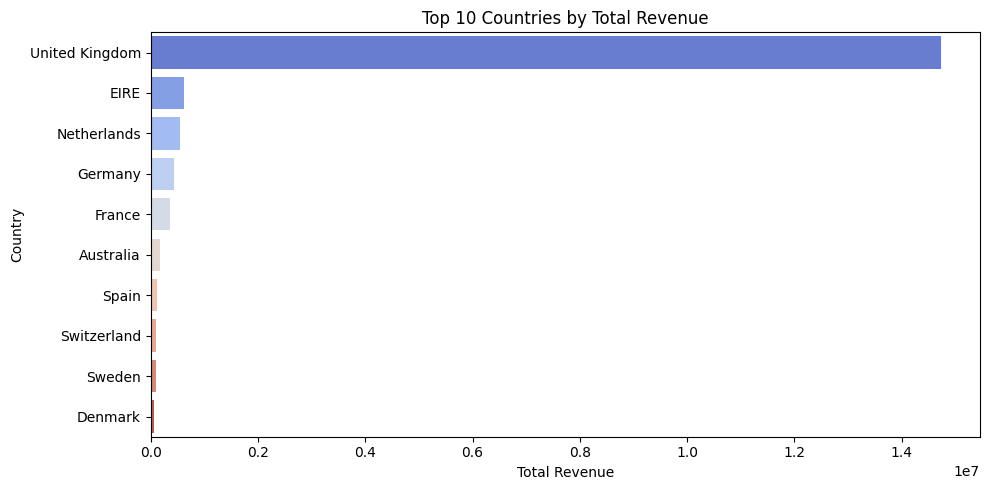

In [ ]:
#Country-wise revenue
country_sales = df_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).reset_index()


plt.figure(figsize=(10,5))
sns.barplot(data=country_sales.head(10), x='TotalPrice', y='Country', palette='coolwarm')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


C:\Users\avnis\AppData\Local\Temp\ipykernel_31248\1767638269.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x='Month', y='TotalPrice', palette='viridis')


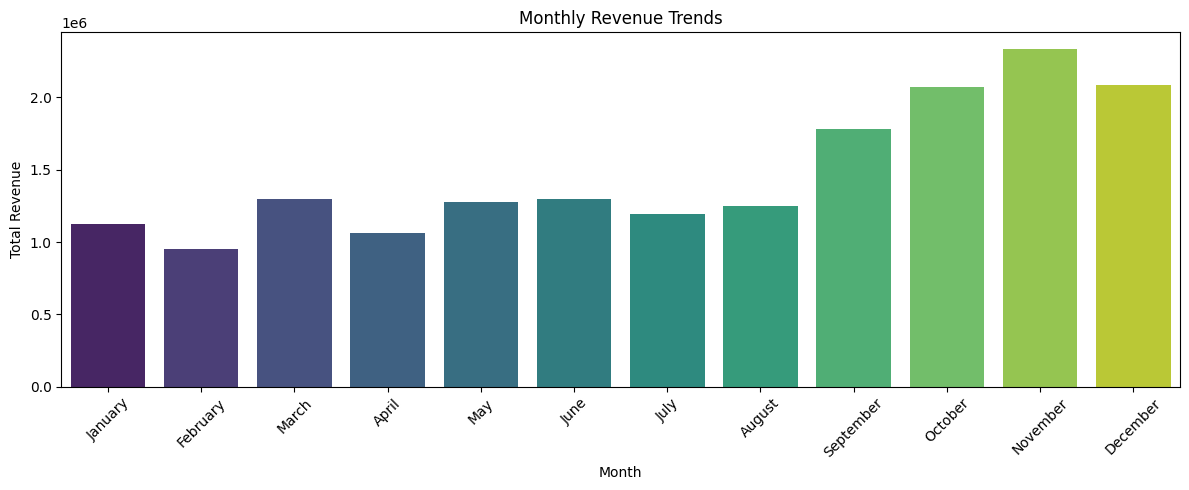

In [ ]:
df_clean['Month'] = df_clean['InvoiceDate'].dt.month_name()

#Order months properly
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']


monthly_sales = df_clean.groupby('Month')['TotalPrice'].sum().reindex(month_order).dropna().reset_index()


plt.figure(figsize=(12,5))
sns.barplot(data=monthly_sales, x='Month', y='TotalPrice', palette='viridis')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
